<a href="https://colab.research.google.com/github/solobala/ABD26/blob/main/ABD26_DZ2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт библиотек

In [ ]:
import pandas as pd
import numpy as np 
from numpy.random import seed
import os
from zipfile import ZipFile
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import scipy as sp
import scipy.stats as sst
from scipy.stats import shapiro
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [ ]:
def shapiro_test(names,datas):
    """
    Служебная функция для вывода информации o нормальности распределений А и B 
    по тесту Шапиро-Уилкса c уровнем значимости 0.05.
    на входе - список выборок
    """
    seed(1)
    for data in datas:
        stat, p = shapiro(data)
        print(names[datas.index(data)])
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        alpha = 0.05
        if p > alpha:
            print('Предположительно нормальное распределение (Недостаточно данных, чтобы отвергнуть H0)')
        else:
            print('Отвергаем H0 о нормальности распределения')
        print()

# Загрузка датасета

In [ ]:
!wget 'https://u.netology.ru/backend/uploads/lms/attachments/files/data/22778/%D0%9C%D0%B0%D1%82%D0%B5%D1%80%D0%B8%D0%B0%D0%BB%D1%8B_%D0%BA_%D0%BB%D0%B5%D0%BA%D1%86%D0%B8%D0%B8_2.zip'

--2022-11-29 18:18:50--  https://u.netology.ru/backend/uploads/lms/attachments/files/data/22778/%D0%9C%D0%B0%D1%82%D0%B5%D1%80%D0%B8%D0%B0%D0%BB%D1%8B_%D0%BA_%D0%BB%D0%B5%D0%BA%D1%86%D0%B8%D0%B8_2.zip
Resolving u.netology.ru (u.netology.ru)... 213.180.193.247, 2a02:6b8::1da
Connecting to u.netology.ru (u.netology.ru)|213.180.193.247|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67282 (66K) [application/x-zip-compressed]
Saving to: ‘Материалы_к_лекции_2.zip’

Материалы_к_лекции_ 100%[===================>]  65.71K   293KB/s    in 0.2s    

Last-modified header invalid -- time-stamp ignored.
2022-11-29 18:18:51 (293 KB/s) - ‘Материалы_к_лекции_2.zip’ saved [67282/67282]



In [ ]:
with ZipFile('/content/Материалы_к_лекции_2.zip', 'r') as zip_file:
  zip_file.extract('homework.csv') 

# Обработка данных

In [ ]:
df = pd.read_csv("homework.csv")

In [ ]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [ ]:
# Построить scatter график по параметрам crim, medv

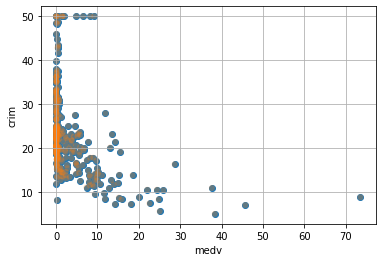

In [ ]:
x  =df['crim']
y = df['medv']
fig, ax = plt.subplots()
plt.scatter(x,y)
ax.scatter(x, y, alpha=0.3, edgecolors='none')
ax.set_ylabel('crim')
ax.set_xlabel('medv')

ax.grid(True)
plt.show()

In [ ]:
# Построить scatter график по параметрам rm, medv

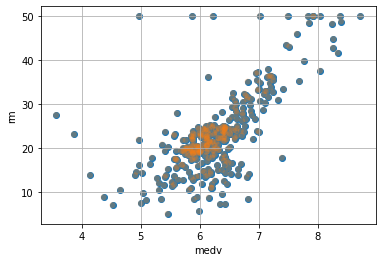

In [ ]:
x  =df['rm']
y = df['medv']
fig, ax = plt.subplots()
plt.scatter(x,y)
ax.scatter(x, y, alpha=0.3, edgecolors='none')
ax.set_ylabel('rm')
ax.set_xlabel('medv')

ax.grid(True)
plt.show()

In [ ]:
# Сформировать X и y из df, выбрав нужные колонки - сначала запихнем все, потом, видимо, придется отбирать нужнеы

In [ ]:
df.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [ ]:
X, y = df[['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad','tax', 'ptratio', 'black', 'lstat']] , df['medv']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Разбить данные на данные для обучения и проверки

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Создать и обучить модель LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# Оценить качество на тестовой выборки

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([21.89392851,  9.60290347, 31.03458235, 18.49851938, 18.71484675,
       34.60812132, 16.56463984, 34.09793132, 20.66454281, 45.06456303,
       24.16907713, 23.1104301 , 28.13277519, 15.20489518, 23.29001372,
       24.09232701, 35.06524133, 35.0900592 , 21.52506841, 26.15200975,
        8.44716858, 28.91339873, 27.6736522 , 22.41997155, 25.13206261,
       11.10055806, 19.55464571, 21.80385926, 19.96195727, 26.51145541,
       23.48129912, 19.91225947, 21.61202997, 13.90026926, 12.91739645,
       33.33340776, 25.53034406, 28.30383308, 16.53472392, 36.58402847,
       17.16428055, 21.91304337, 24.86689076, 23.25675527, 24.22129751,
       19.33331598, 16.56673044, 22.08698647, 13.50618193, 21.88270327,
       20.44620592, 17.30252361, 27.27735551, 10.39932026, 22.05073414,
       27.19900144, 15.61513533, 21.02613189, 18.19719294, 11.56467223,
       16.65514841, 24.96613043,  0.38209073, 34.4760159 , 20.76925403,
       23.00340827, 26.07816399])

In [ ]:
print (f' Коэффициент детерминации: {model.score(X_test, y_test)}') 

 Коэффициент детерминации: 0.68064062403508


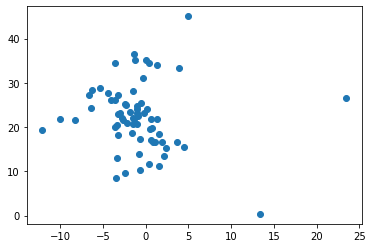

In [ ]:
residuals = y_test-y_pred
plt.scatter(residuals,y_pred)
plt.show()

In [ ]:
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from numpy.random import seed

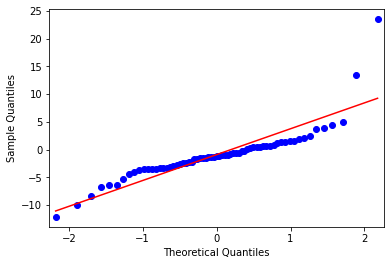

In [ ]:
seed(1)
qqplot(residuals, line='s')
plt.show()

In [ ]:
mean_squared_error(y_test, y_pred)

22.56063195506933

К-т детерминации маленький, Ошибка большая.

# Альтернативный способ построенич линейной регрессии


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
X_const = sm.add_constant(X_train) # техническая особенность библиотеки, надо руками добавить константу

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
X_const


,const,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
224,1.0,340,0.05497,0.0,5.19,0,0.5150,5.985,45.4,4.8122,5,224,20.2,396.90,9.74
78,1.0,118,0.15098,0.0,10.01,0,0.5470,6.021,82.6,2.7474,6,432,17.8,394.51,10.30
295,1.0,456,4.75237,0.0,18.10,0,0.7130,6.525,86.5,2.4358,24,666,20.2,50.92,18.13
17,1.0,28,0.95577,0.0,8.14,0,0.5380,6.047,88.8,4.4534,4,307,21.0,306.38,17.28
24,1.0,43,0.14150,0.0,6.91,0,0.4480,6.169,6.6,5.7209,3,233,17.9,383.37,5.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,1.0,283,0.06129,20.0,3.33,1,0.4429,7.645,49.7,5.2119,5,216,14.9,377.07,3.01
71,1.0,107,0.17120,0.0,8.56,0,0.5200,5.836,91.9,2.2110,5,384,20.9,395.67,18.66
106,1.0,159,1.34284,0.0,19.58,0,0.6050,6.066,100.0,1.7573,5,403,14.7,353.89,6.43
270,1.0,418,25.94060,0.0,18.10,0,0.6790,5.304,89.1,1.6475,24,666,20.2,127.36,26.64


In [ ]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     48.14
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           7.88e-63
Time:                        18:19:25   Log-Likelihood:                -790.56
No. Observations:                 266   AIC:                             1611.
Df Residuals:                     251   BIC:                             1665.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.3838      6.938      5.532      0.0

In [ ]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const      38.383792
ID         -0.004902
crim       -0.070217
zn          0.061337
indus      -0.024444
chas        4.174129
nox       -14.787057
rm          3.397953
age        -0.014945
dis        -1.863079
rad         0.421680
tax        -0.013171
ptratio    -0.734327
black       0.008077
lstat      -0.637599
dtype: float64
R2:  0.7286502774469663


(array([ 1.,  1., 14., 15., 38., 47., 67., 26., 26.,  6.,  8.,  3.,  5.,
         3.,  3.,  0.,  0.,  0.,  1.,  2.]),
 array([-11.4144483 ,  -9.68563405,  -7.95681979,  -6.22800553,
         -4.49919128,  -2.77037702,  -1.04156276,   0.68725149,
          2.41606575,   4.14488001,   5.87369426,   7.60250852,
          9.33132278,  11.06013703,  12.78895129,  14.51776555,
         16.2465798 ,  17.97539406,  19.70420832,  21.43302257,
         23.16183683]),
 <a list of 20 Patch objects>)

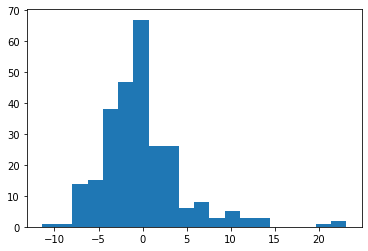

In [ ]:
plt.hist(results.resid, bins=20)

Модель получилась не хорошая, к-т детерминации далек от 1. Нужно ее поменять. Убрать лишние колонки, Убрать выбросы, проверить данные на нормальность распределения

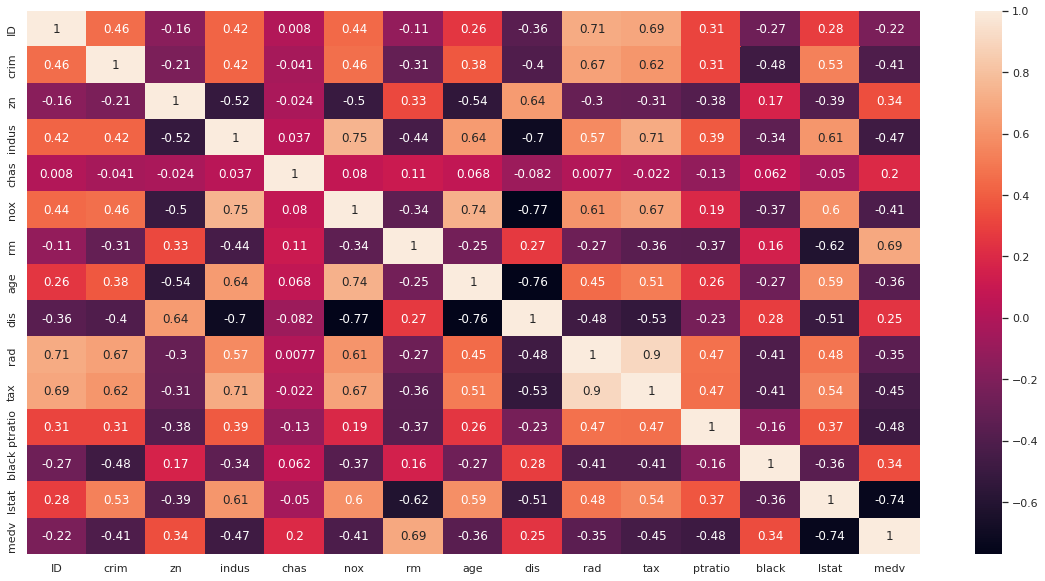

In [ ]:
plt.figure(figsize=(20, 10))
# коэффициент корреляции на тепловой карте
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df.corr(), annot=True)

Для определения статистической достоверности корреляционной связи r-Пирсона была использована таблица критических значений корреляции Пирсона. https://statpsy.ru/pearson/tablica-pirsona/?ysclid=l9k4a62xb2793082968.

Для данной выборки в 333 элемент для уровня значимости p=0,05 минимальое значение к-та Пирсона =0,11. Получается, что лишних данных нет?

для проверки распределения выборки данных построим график квантиль-квантиль, график Q-Q для столбцов с наибольшим значением к-та корреляции с medv

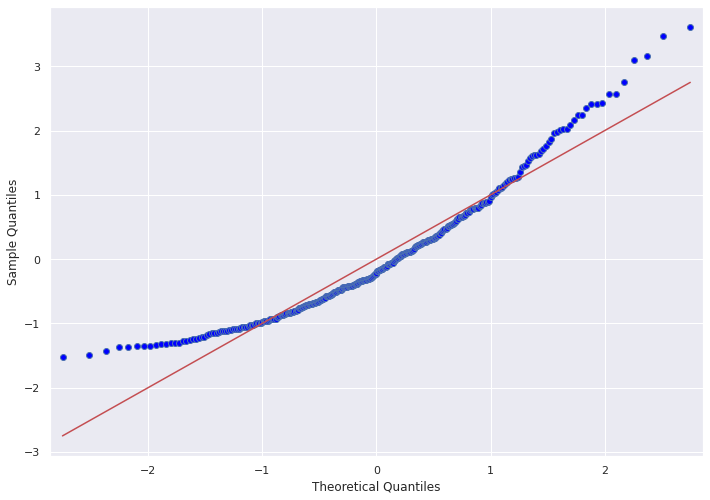

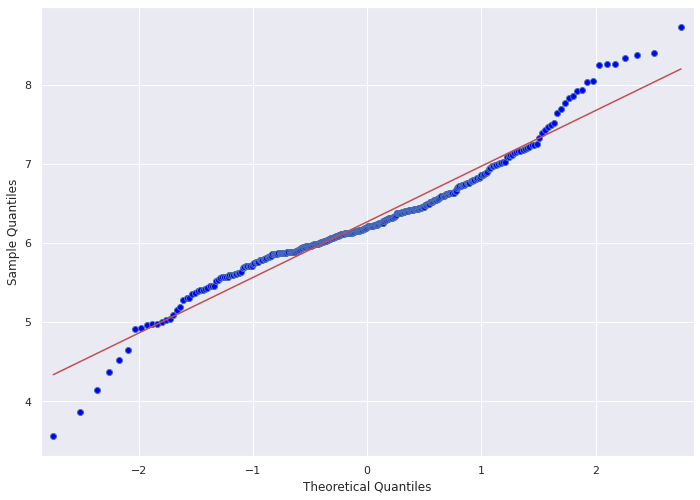

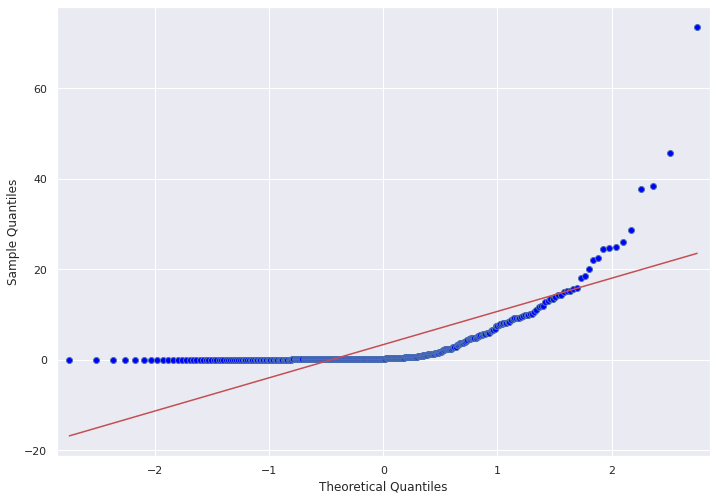

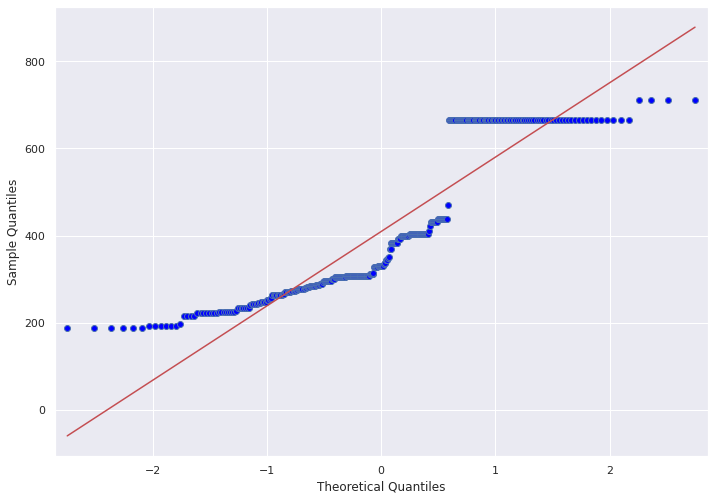

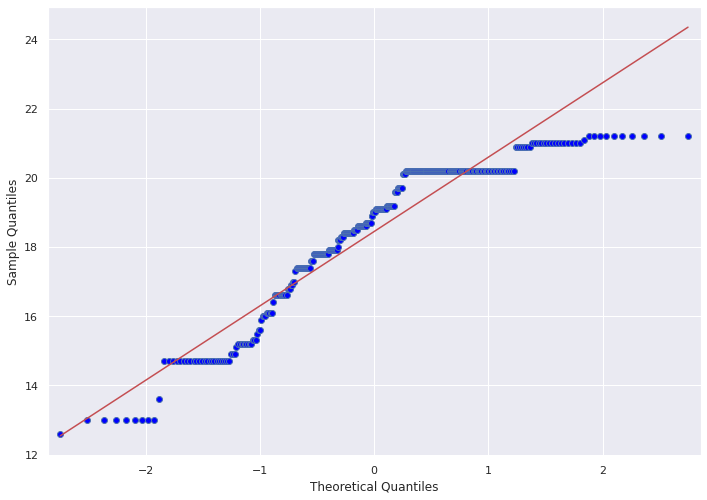

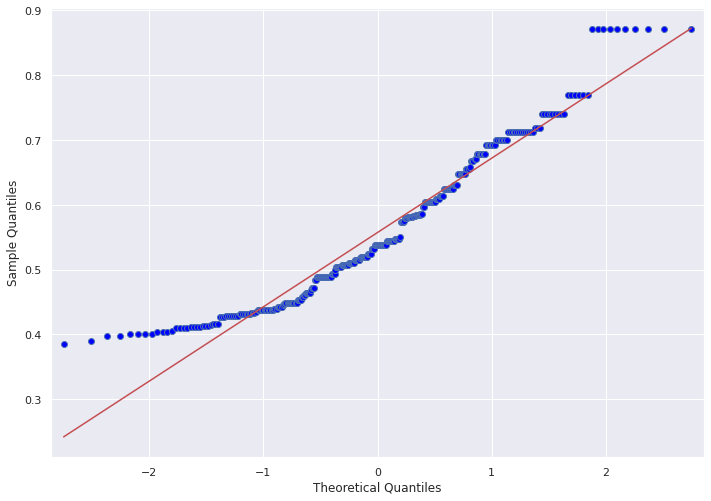

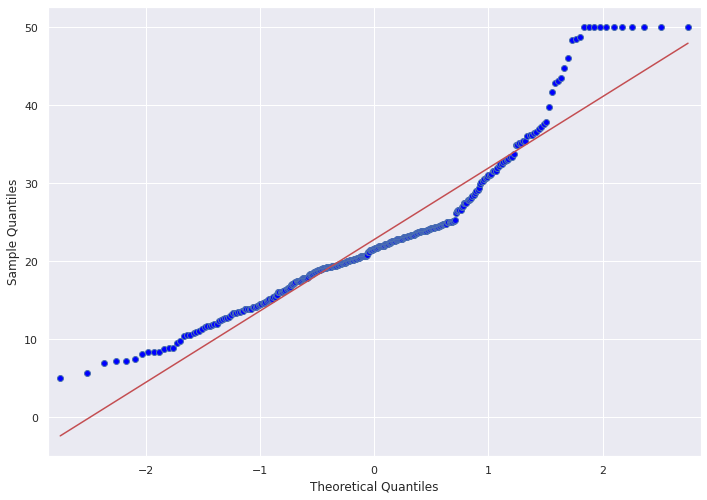

In [ ]:
seed(1)

names=['lstat','rm','crim','tax','ptratio','nox','medv']
qqplot(df['lstat'], fit = True, line='s')
qqplot(df['rm'], line='s')
qqplot(df['crim'], line='s')
qqplot(df['tax'], line='s')
qqplot(df['ptratio'], line='s')
qqplot(df['nox'], line='s')
qqplot(df['medv'], line='s')
pyplot.show()

H0: столбцы имеют нормальное распределение

In [ ]:
for name in names:
  print(name, ':',  shapiro(df[name]))


lstat : ShapiroResult(statistic=0.9328781366348267, pvalue=4.166783237891103e-11)
rm : ShapiroResult(statistic=0.9584915041923523, pvalue=4.146063048438009e-08)
crim : ShapiroResult(statistic=0.4979659914970398, pvalue=1.2780129559315122e-29)
tax : ShapiroResult(statistic=0.8197426795959473, pvalue=5.476359068177094e-19)
ptratio : ShapiroResult(statistic=0.8982203006744385, pvalue=3.8152020740778517e-14)
nox : ShapiroResult(statistic=0.9387959837913513, pvalue=1.7289865372749347e-10)
medv : ShapiroResult(statistic=0.913820743560791, pvalue=7.000854431761516e-13)


p-Value <0.05, Отвергаем гипотезу о нормальности распределения по всем столбцам

посмотрим на выбросы по столбцам с наибольшим к-том корреляции

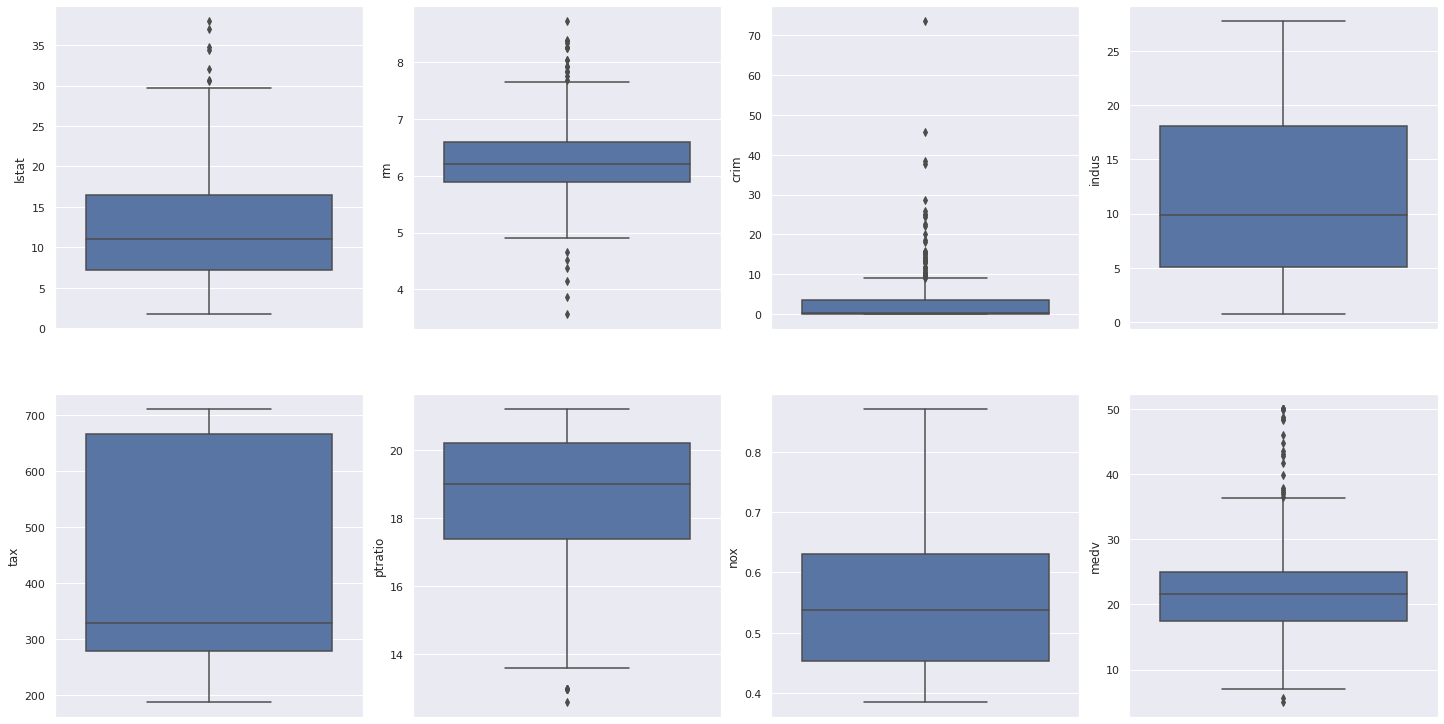

In [ ]:
data = df[['lstat', 'rm', 'crim', 'indus', 'tax', 'ptratio', 'nox', 'medv']]
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Много выбросов в rm crym, lstat и medv. Удалим выбросы из medv

In [ ]:
q1 = df['medv'].quantile(0.25)
q3 = df['medv'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
data = df[df['medv'].between(lower_bound, upper_bound, 'both')]
data # без выбросов

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [ ]:
print(f' Удаленные выбросы составляют {round((len(df)-len(data))/len(df)*100,1)} % от общего числа записей выборки')


 Удаленные выбросы составляют 8.4 % от общего числа записей выборки


#  Регрессионная модель с предобработкой факторов

Попробуем построить модель линейной регрессии  на всех полях без выбросов с логарифмированием( чтобы снизить эффект от ненормальности распределения)

In [ ]:
X, y =data[['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad','tax', 'ptratio', 'black', 'lstat']], data['medv']

In [ ]:
y =  np.log1p(y)
for col in X.columns:
    if np.abs(X[col].skew()) > 0.3:
        X[col] = np.log1p(X[col])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([3.41309883, 3.11923333, 2.36378034, 3.29484794, 2.60118638,
       2.72303802, 2.87086674, 3.19088959, 2.58804447, 3.18661353,
       3.19257994, 2.7021312 , 2.81514826, 2.88646737, 3.10852309,
       3.08412473, 3.30247391, 2.70234379, 2.68519691, 2.76409864,
       3.10715319, 3.04606458, 2.99997486, 3.18612693, 3.21667556,
       2.90590883, 3.33290064, 3.03886912, 3.09823557, 3.40655334,
       3.34502943, 2.89280816, 2.90885645, 3.03780207, 2.78131199,
       3.06674756, 3.0594    , 2.5034151 , 2.6803445 , 2.85330758,
       2.98576558, 3.14300858, 3.22459165, 2.51246623, 3.54525823,
       2.85929668, 2.66083727, 3.1325077 , 3.26737828, 3.09544875,
       3.15665365, 3.16766802, 3.01280543, 2.95007849, 2.75528289,
       2.945854  , 3.32692811, 3.62164035, 2.44101806, 3.47767869,
       3.08727374])

In [ ]:
print (f' Коэффициент детерминации: {model.score(X_test, y_test)}') 

 Коэффициент детерминации: 0.6717101195503745


In [ ]:
mean_squared_error(y_test, y_pred)

0.03152367667897346

In [ ]:
model.coef_

array([ 1.64325502e-05, -1.13251691e-01,  1.89400408e-03,  3.04139098e-03,
        1.38719001e-01, -4.93287759e-01,  3.94671678e-01,  1.95540198e-02,
       -8.24404412e-02,  1.38035161e-01, -1.20899598e-01, -4.20279285e-01,
        7.95196369e-02, -3.75055996e-01])

In [ ]:
model.intercept_

4.740889659957018

In [ ]:
print(f'Уравнение линнейной регрессии y= {model.coef_[0]} * ID + {model.coef_[1]} * crim + {model.coef_[2]} * zn + \
{model.coef_[3]} * indus + {model.coef_[4]} * chas + {model.coef_[5]} * nox + {model.coef_[6]} * rm + {model.coef_[7]} \
* age + {model.coef_[8]} * dis + {model.coef_[9]} * rad + {model.coef_[10]} *tax + {model.coef_[11]} * ptratio\
+ {model.coef_[12]} * black + {model.coef_[13]} *lstat + {model.intercept_}')

Уравнение линнейной регрессии y= 1.6432550241358266e-05 * ID + -0.11325169077483987 * crim + 0.0018940040848341461 * zn + 0.0030413909834185043 * indus + 0.1387190013342927 * chas + -0.49328775878508785 * nox + 0.39467167766115474 * rm + 0.0195540197536576 * age + -0.08244044120154481 * dis + 0.13803516138673874 * rad + -0.12089959753621397 *tax + -0.4202792847571779 * ptratio+ 0.07951963694711416 * black + -0.37505599575826015 *lstat + 4.740889659957018
